In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

In [4]:
# current_dir = Path.cwd()
# file_path = current_dir.parent / "Datasets_from_the_book" / "baseball.dat"

In [5]:
def AIC(N, mse, s):
    """Akaike Information Criterion.
    N is number of datapoints
    mse is "mean squard error", sum of squared residuals divided by N
    s is number of predictors
    """
    return N*np.log(mse/N) + 2*(s + 2)

In [6]:
df = pd.read_csv("../../Datasets_from_the_book/baseball.dat", sep="\s+", dtype=np.float64)
categories = df.columns.tolist()
data = df.to_numpy()

In [7]:
df

,salary,average,obp,runs,hits,doubles,triples,homeruns,rbis,walks,...,rbisperso,walksperso,obppererror,runspererror,hitspererror,hrspererror,soserrors,sbsobp,sbsruns,sbshits
0,3300.0,0.272,0.302,69.0,153.0,21.0,4.0,31.0,104.0,22.0,...,1.3000,0.2750,0.0755,17.2500,38.2500,7.7500,320.0,1.208,276.0,612.0
1,2600.0,0.269,0.335,58.0,111.0,17.0,2.0,18.0,66.0,39.0,...,0.9565,0.5652,0.0838,14.5000,27.7500,4.5000,276.0,0.000,0.0,0.0
2,2500.0,0.249,0.337,54.0,115.0,15.0,1.0,17.0,73.0,63.0,...,0.6293,0.5431,0.0562,9.0000,19.1667,2.8333,696.0,2.022,324.0,690.0
3,2475.0,0.260,0.292,59.0,128.0,22.0,7.0,12.0,50.0,23.0,...,0.7812,0.3594,0.0133,2.6818,5.8182,0.5455,1408.0,6.132,1239.0,2688.0
4,2313.0,0.273,0.346,87.0,169.0,28.0,5.0,8.0,58.0,70.0,...,1.0943,1.3208,0.0384,9.6667,18.7778,0.8889,477.0,1.038,261.0,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,170.0,0.111,0.138,3.0,3.0,0.0,0.0,0.0,1.0,1.0,...,0.1429,0.1429,0.1380,3.0000,3.0000,0.0000,7.0,0.000,0.0,0.0
333,160.0,0.264,0.318,24.0,48.0,7.0,0.0,1.0,22.0,15.0,...,1.2222,0.8333,0.0398,3.0000,6.0000,0.1250,144.0,0.000,0.0,0.0
334,142.0,0.187,0.281,38.0,50.0,9.0,2.0,15.0,37.0,32.0,...,0.3776,0.3265,0.0281,3.8000,5.0000,1.5000,980.0,0.000,0.0,0.0
335,140.0,0.264,0.270,24.0,74.0,16.0,0.0,3.0,27.0,5.0,...,0.6429,0.1190,0.0245,2.1818,6.7273,0.2727,462.0,0.000,0.0,0.0


In [8]:
X = data[:, 1:]
y = data[:, 0]

# 3.1. a)

In [9]:
n = X.shape[1]

# Create array of random 
rand_predictors = np.zeros(n, dtype=int)
rand_predictors[:5] = 1
np.random.shuffle(rand_predictors)
rand_predictors

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1])

In [10]:
list_indices_rand_predictors = list(np.nonzero(rand_predictors)[0])
list_indices_rand_predictors

[np.int64(8), np.int64(13), np.int64(15), np.int64(25), np.int64(26)]

In [11]:
X[:, list_indices_rand_predictors]

array([[2.2000e+01, 0.0000e+00, 1.9125e+00, 2.7600e+02, 6.1200e+02],
       [3.9000e+01, 0.0000e+00, 1.6087e+00, 0.0000e+00, 0.0000e+00],
       [6.3000e+01, 0.0000e+00, 9.9140e-01, 3.2400e+02, 6.9000e+02],
       ...,
       [3.2000e+01, 0.0000e+00, 5.1020e-01, 0.0000e+00, 0.0000e+00],
       [5.0000e+00, 0.0000e+00, 1.7619e+00, 0.0000e+00, 0.0000e+00],
       [7.0000e+00, 0.0000e+00, 7.2730e-01, 0.0000e+00, 0.0000e+00]],
      shape=(337, 5))

In [12]:
X_trail = X[:, list_indices_rand_predictors]

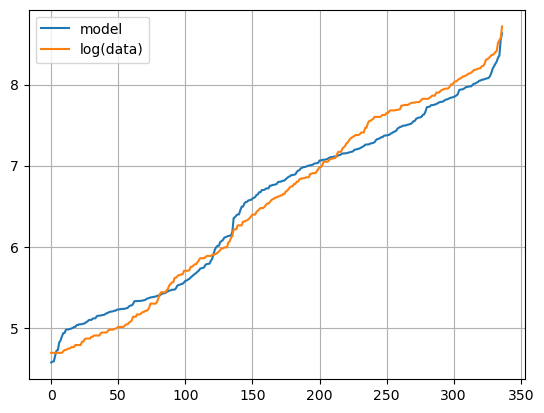

In [13]:
model = LinearRegression(fit_intercept=True).fit(X, np.log(y))

plt.plot(np.sort(model.predict(X)), "-", label="model")
plt.plot(np.sort(np.log(y)), "-", label="log(data)")
plt.grid()
plt.legend()
plt.show()

(array([61., 27., 32., 23., 34., 36., 23., 54., 36., 11.]),
 array([4.69134788, 5.0938175 , 5.49628712, 5.89875673, 6.30122635,
        6.70369597, 7.10616558, 7.5086352 , 7.91110482, 8.31357443,
        8.71604405]),
 [<matplotlib.patches.Polygon at 0x1343c3d7b60>])

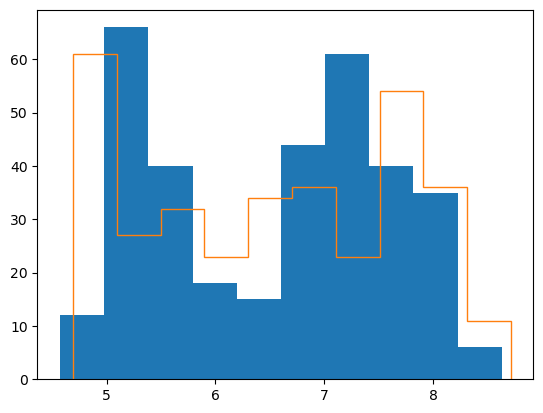

In [14]:
plt.hist(model.predict(X))
plt.hist(np.log(y), histtype="step")

In [37]:
log_y = np.log(y)

# Create array of five 1s randomly placed, rest is zero 
rand_predictors = np.zeros(n, dtype=int)
rand_predictors[:5] = 1
np.random.shuffle(rand_predictors)
rand_predictors

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

initial_score: -22.80171330812555 
initial_predictors: 
[1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.909073503679699 -24.801035578542482
[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.911751667953415 -24.790571596052672
[1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.411976267719445 -22.817071977308416
[1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.186627437524925 -23.78306274279847
[1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 9.083415323296832 -17.41343839401994
[1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.828829148820457 -21.11645814001473
[1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.868660337387175 -20.959430076775888
[1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.530131500144177 -22.32406419692383
[1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 6.506581323344536 -22.421612631694884
[1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0

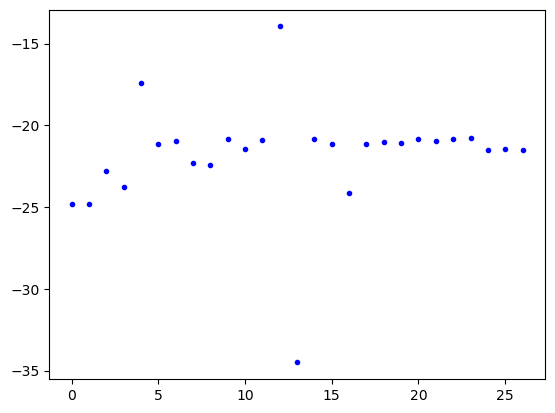

In [ ]:
initial_predictors = np.copy(rand_predictors)
list_indices_initial_predictors = list(np.nonzero(initial_predictors)[0])

initial_X = X[:, list_indices_initial_predictors]

model = LinearRegression(fit_intercept=True).fit(initial_X, log_y)
prediction = model.predict(initial_X)
mse = np.sum((prediction - log_y)**2)/n
initial_score = AIC(N=n, mse=mse, s=len(list_indices_initial_predictors))
print(f"initial_score: {initial_score} \n"
      f"initial_predictors: \n" 
      f"{initial_predictors}")

best_score_AIC = np.copy(initial_score)
best_predictors = np.copy(initial_predictors)

# Count total loop iterations made
ii = 0

for i, pred in enumerate(initial_predictors):
    
    current_predictors = np.copy(initial_predictors)

    if pred == 0:
        current_predictors[i] = 1
    else:
        current_predictors[i] = 0

    list_indices_current_predictors = list(np.nonzero(current_predictors)[0])    
    current_X = X[:, list_indices_current_predictors]

    model = LinearRegression(fit_intercept=True).fit(current_X, log_y)
    prediction = model.predict(current_X)
    mse = np.sum((prediction - log_y)**2)/n
    current_score_AIC = AIC(N=n, mse=mse, s=len(list_indices_current_predictors))

    print(current_predictors, mse, current_score_AIC)

    plt.plot(i, current_score_AIC, ".b")

    if current_score_AIC < best_score_AIC:
        best_score_AIC = np.copy(current_score_AIC)
        best_predictors = np.copy(current_predictors)

    ii += 1

plt.show()